In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
# SimpleImputer is now imported from sklearn.impute
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor  # For feature importance

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv("cdfc_data.csv")
print("Initial Data Preview:\n", df.head())
print("\nData Summary:\n", df.info())
# df['DISBMONTH'] = pd.to_datetime(df['DISBMONTH'], errors='coerce')
# print("\nConverted DISBMONTH to datetime:\n", df['DISBMONTH'].head())
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
# print("\nMissing values after filling numerical columns:\n", df.isnull().sum())


Initial Data Preview:
     DISBMONTH  LOAN_NUMBER CD_SEGMENT PRODUCT_CODE ETC_NTC PAYMENT_TYPE  \
0  10-31-2022            1     MOBILE       MOBILE     NTC          ADM   
1  11-30-2022            2     MOBILE       MOBILE     ETC          ADM   
2  10-31-2022            3     MOBILE       MOBILE     ETC         ENCH   
3  10-31-2022            4     MOBILE       MOBILE     ETC          ADM   
4  10-31-2022            5     MOBILE       MOBILE     ETC          ADM   

   CUST_PINCODE CUST_STATE MANUFACTURE_CODE  TENUR  ...  TOTAL_NO_ENQ  \
0      517551.0         AP             OPPO    7.0  ...             0   
1      517002.0         AP          SAMSUNG    6.0  ...             4   
2      517132.0         AP             OPPO    8.0  ...             0   
3      517130.0         AP             OPPO    7.0  ...             2   
4      515212.0         AP             OPPO    7.0  ...             8   

   TOTAL_NO_ENQ_LAST_3M  TOTAL_NO_ENQ_CD  TOTAL_NO_ENQ_CD_LAST_3M  \
0                 

In [ ]:
# Get the number of rows in df_cleaned
num_rows = len(df)
print("Number of rows in df_cleaned:", num_rows)

Number of rows in df_cleaned: 566102


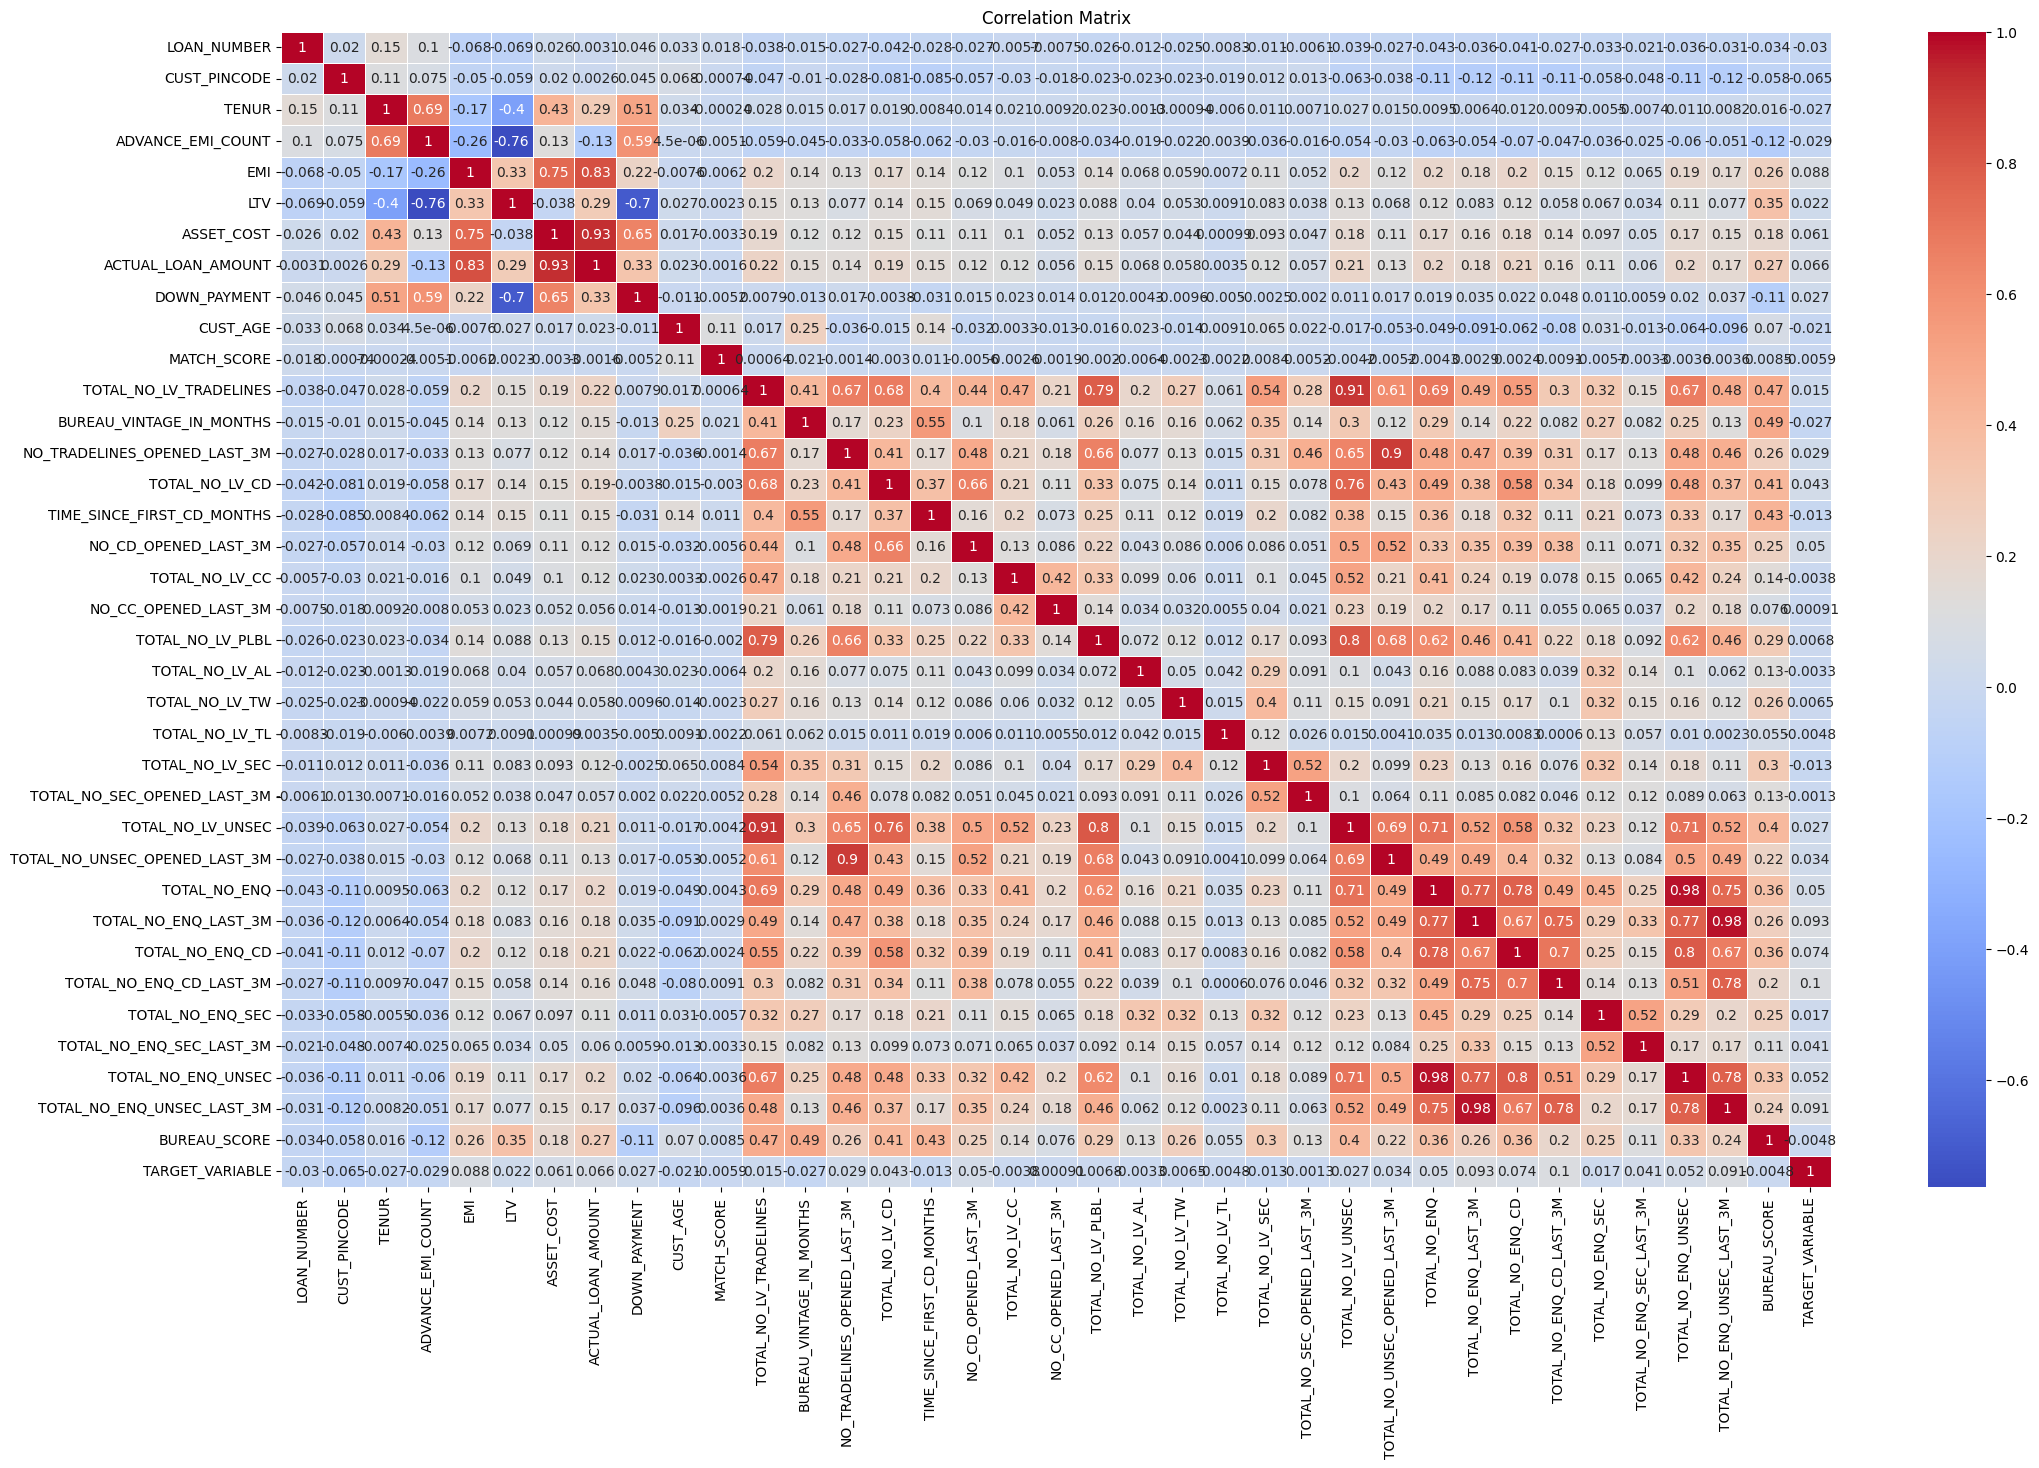

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical columns only
corr_matrix = df.corr(numeric_only=True)

# Display the correlation matrix using a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set the threshold for high correlation (e.g., 0.75)
threshold = 0.65

# Create a set to store the highly correlated feature pairs
high_corr_pairs = set()

# Iterate through the correlation matrix to find pairs
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Iterate only through the upper triangle to avoid duplicates
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_corr_pairs.add(feature_pair)

# Display highly correlated feature pairs
for pair in high_corr_pairs:
    print(pair, end=" ")
    print(",")


('LTV', 'DOWN_PAYMENT') ,
('ASSET_COST', 'ACTUAL_LOAN_AMOUNT') ,
('EMI', 'ACTUAL_LOAN_AMOUNT') ,
('TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_UNSEC') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_LV_PLBL') ,
('TOTAL_NO_LV_CD', 'NO_CD_OPENED_LAST_3M') ,
('EMI', 'ASSET_COST') ,
('TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_CD') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_LV_CD') ,
('TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_CD_LAST_3M') ,
('TOTAL_NO_ENQ_CD_LAST_3M', 'TOTAL_NO_ENQ_UNSEC_LAST_3M') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_ENQ_UNSEC') ,
('ASSET_COST', 'DOWN_PAYMENT') ,
('TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_UNSEC_LAST_3M') ,
('TOTAL_NO_LV_UNSEC', 'TOTAL_NO_UNSEC_OPENED_LAST_3M') ,
('TOTAL_NO_LV_TRADELINES', 'NO_TRADELINES_OPENED_LAST_3M') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_ENQ') ,
('NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_LV_PLBL') ,
('TOTAL_NO_LV_CD', 'TOTAL_NO_LV_UNSEC') ,
('TOTAL_NO_ENQ_UNSEC', 'TOTAL_NO_ENQ_UNSEC_LAST_3M') ,
('TOTAL_NO_LV_UNSEC', 'TOTAL_NO_ENQ_UNSEC') ,
('NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_

In [ ]:
from collections import defaultdict

# Example input list of highly correlated pairs (for threshold 0.75)
correlated_pairs = [
    ('TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_CD_LAST_3M') ,
('TENUR', 'ADVANCE_EMI_COUNT') ,
('TOTAL_NO_LV_UNSEC', 'TOTAL_NO_UNSEC_OPENED_LAST_3M') ,
('NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_UNSEC_OPENED_LAST_3M') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_ENQ') ,
('TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_UNSEC_LAST_3M') ,
('ASSET_COST', 'DOWN_PAYMENT') ,
('TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_UNSEC') ,
('TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_CD') ,
('TOTAL_NO_LV_UNSEC', 'TOTAL_NO_ENQ_UNSEC') ,
('ASSET_COST', 'ACTUAL_LOAN_AMOUNT') ,
('TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_UNSEC_LAST_3M') ,
('TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_UNSEC') ,
('TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_CD') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_LV_PLBL') ,
('TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_CD_LAST_3M') ,
('TOTAL_NO_LV_PLBL', 'TOTAL_NO_UNSEC_OPENED_LAST_3M') ,
('TOTAL_NO_LV_TRADELINES', 'NO_TRADELINES_OPENED_LAST_3M') ,
('LTV', 'DOWN_PAYMENT') ,
('EMI', 'ASSET_COST') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_LV_CD') ,
('TOTAL_NO_LV_PLBL', 'TOTAL_NO_LV_UNSEC') ,
('TOTAL_NO_LV_UNSEC', 'TOTAL_NO_ENQ') ,
('TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_UNSEC_LAST_3M') ,
('TOTAL_NO_ENQ_UNSEC', 'TOTAL_NO_ENQ_UNSEC_LAST_3M') ,
('TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_LAST_3M') ,
('TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_UNSEC') ,
('TOTAL_NO_ENQ_CD_LAST_3M', 'TOTAL_NO_ENQ_UNSEC_LAST_3M') ,
('NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_LV_PLBL') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_ENQ_UNSEC') ,
('TOTAL_NO_LV_CD', 'NO_CD_OPENED_LAST_3M') ,
('TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_LV_UNSEC') ,
('ADVANCE_EMI_COUNT', 'LTV') ,
('TOTAL_NO_LV_CD', 'TOTAL_NO_LV_UNSEC') ,
('EMI', 'ACTUAL_LOAN_AMOUNT')
]

# Step 1: Create a mapping dictionary to store which feature is selected
merged_features = {}

# Step 2: Function to find the "root" or representative feature
def find_root(feature, feature_map):
    while feature != feature_map.get(feature, feature):
        feature = feature_map[feature]
    return feature

# Step 3: Iterate through pairs and merge them
for A, B in correlated_pairs:
    root_A = find_root(A, merged_features)
    root_B = find_root(B, merged_features)

    if root_A != root_B:
        # Merge them by choosing one as the representative
        merged_features[root_A] = root_B  # Let's say we keep B as the main feature

# Step 4: Identify the final representative features
final_features = defaultdict(set)

for feature in merged_features.keys():
    representative = find_root(feature, merged_features)
    final_features[representative].add(feature)

# Adding features that are not in any correlated pair
for A, B in correlated_pairs:
    final_features[find_root(A, merged_features)].add(A)
    final_features[find_root(B, merged_features)].add(B)

# Output the final mapping
print("Final representative features with their combined pairs:")
for rep_feature, feature_set in final_features.items():
    print(f"Keep '{rep_feature}' and combine: {feature_set}")


Final representative features with their combined pairs:
Keep 'NO_CD_OPENED_LAST_3M' and combine: {'TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_ENQ_UNSEC_LAST_3M', 'TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_UNSEC', 'TOTAL_NO_LV_PLBL', 'NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_ENQ_CD', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_ENQ_CD_LAST_3M', 'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ', 'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_LV_CD'}
Keep 'ACTUAL_LOAN_AMOUNT' and combine: {'ADVANCE_EMI_COUNT', 'TENUR', 'LTV', 'EMI', 'ASSET_COST', 'ACTUAL_LOAN_AMOUNT', 'DOWN_PAYMENT'}


In [ ]:
# List of necessary representative features to keep
necessary_features = [
    'NO_CD_OPENED_LAST_3M','ACTUAL_LOAN_AMOUNT'
]

# List of all features (correlated features)
unnecessary_features = [
    'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_ENQ_CD_LAST_3M', 'NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_ENQ', 'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ_UNSEC', 'TOTAL_NO_LV_TRADELINES', 'TOTAL_NO_LV_PLBL', 'TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_LV_CD', 'TOTAL_NO_ENQ_UNSEC_LAST_3M', 'LTV', 'TENUR', 'EMI', 'ASSET_COST', 'DOWN_PAYMENT', 'ADVANCE_EMI_COUNT'
]

# Assuming your dataset is in a pandas DataFrame named `df`
# Remove the unnecessary features
df_cleaned = df.drop(columns=unnecessary_features)

# Now df_cleaned will only have the necessary features
print(df_cleaned.head())
print(df_cleaned.columns)


    DISBMONTH  LOAN_NUMBER CD_SEGMENT PRODUCT_CODE ETC_NTC PAYMENT_TYPE  \
0  10-31-2022            1     MOBILE       MOBILE     NTC          ADM   
1  11-30-2022            2     MOBILE       MOBILE     ETC          ADM   
2  10-31-2022            3     MOBILE       MOBILE     ETC         ENCH   
3  10-31-2022            4     MOBILE       MOBILE     ETC          ADM   
4  10-31-2022            5     MOBILE       MOBILE     ETC          ADM   

   CUST_PINCODE CUST_STATE MANUFACTURE_CODE  ACTUAL_LOAN_AMOUNT  ...  \
0      517551.0         AP             OPPO             14939.0  ...   
1      517002.0         AP          SAMSUNG             26100.0  ...   
2      517132.0         AP             OPPO             22949.0  ...   
3      517130.0         AP             OPPO             11648.0  ...   
4      515212.0         AP             OPPO             20227.0  ...   

  NO_CC_OPENED_LAST_3M TOTAL_NO_LV_AL TOTAL_NO_LV_TW TOTAL_NO_LV_TL  \
0                    0              0        

In [ ]:
print(len(df_cleaned.columns))

31


In [ ]:
# Get the number of rows in df_cleaned
num_rows = len(df_cleaned)
print("Number of rows in df_cleaned:", num_rows)


Number of rows in df_cleaned: 566102


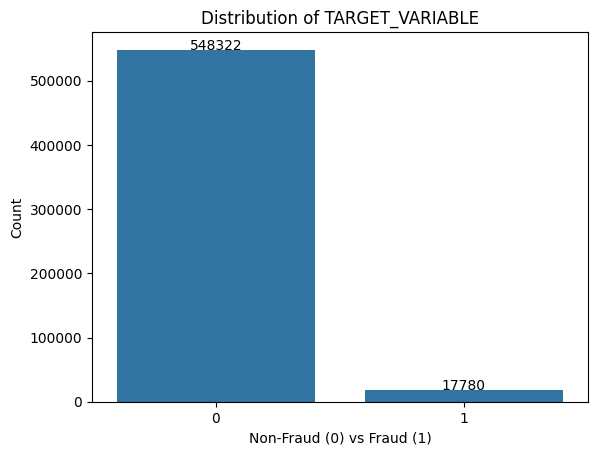

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot
sns.countplot(data=df_cleaned, x='TARGET_VARIABLE')
plt.title('Distribution of TARGET_VARIABLE')
plt.xlabel('Non-Fraud (0) vs Fraud (1)')
plt.ylabel('Count')

# Add numerical values above bars
for p in plt.gca().patches:  # Access the bars (patches) in the plot
    plt.text(
        p.get_x() + p.get_width() / 2,  # x-coordinate of the text (center of the bar)
        p.get_height() + 50,  # y-coordinate (just above the bar)
        f'{int(p.get_height())}',  # Text to display (count)
        ha='center'  # Horizontal alignment
    )

plt.show()


In [ ]:
x=548322/566102
y=17780/566102
print(f"percentage of the target verable as '0' {x*100}")
print(f"percentage of the target verable as '1' {y*100}")

percentage of the target verable as '0' 96.85922324952041
percentage of the target verable as '1' 3.1407767504795956


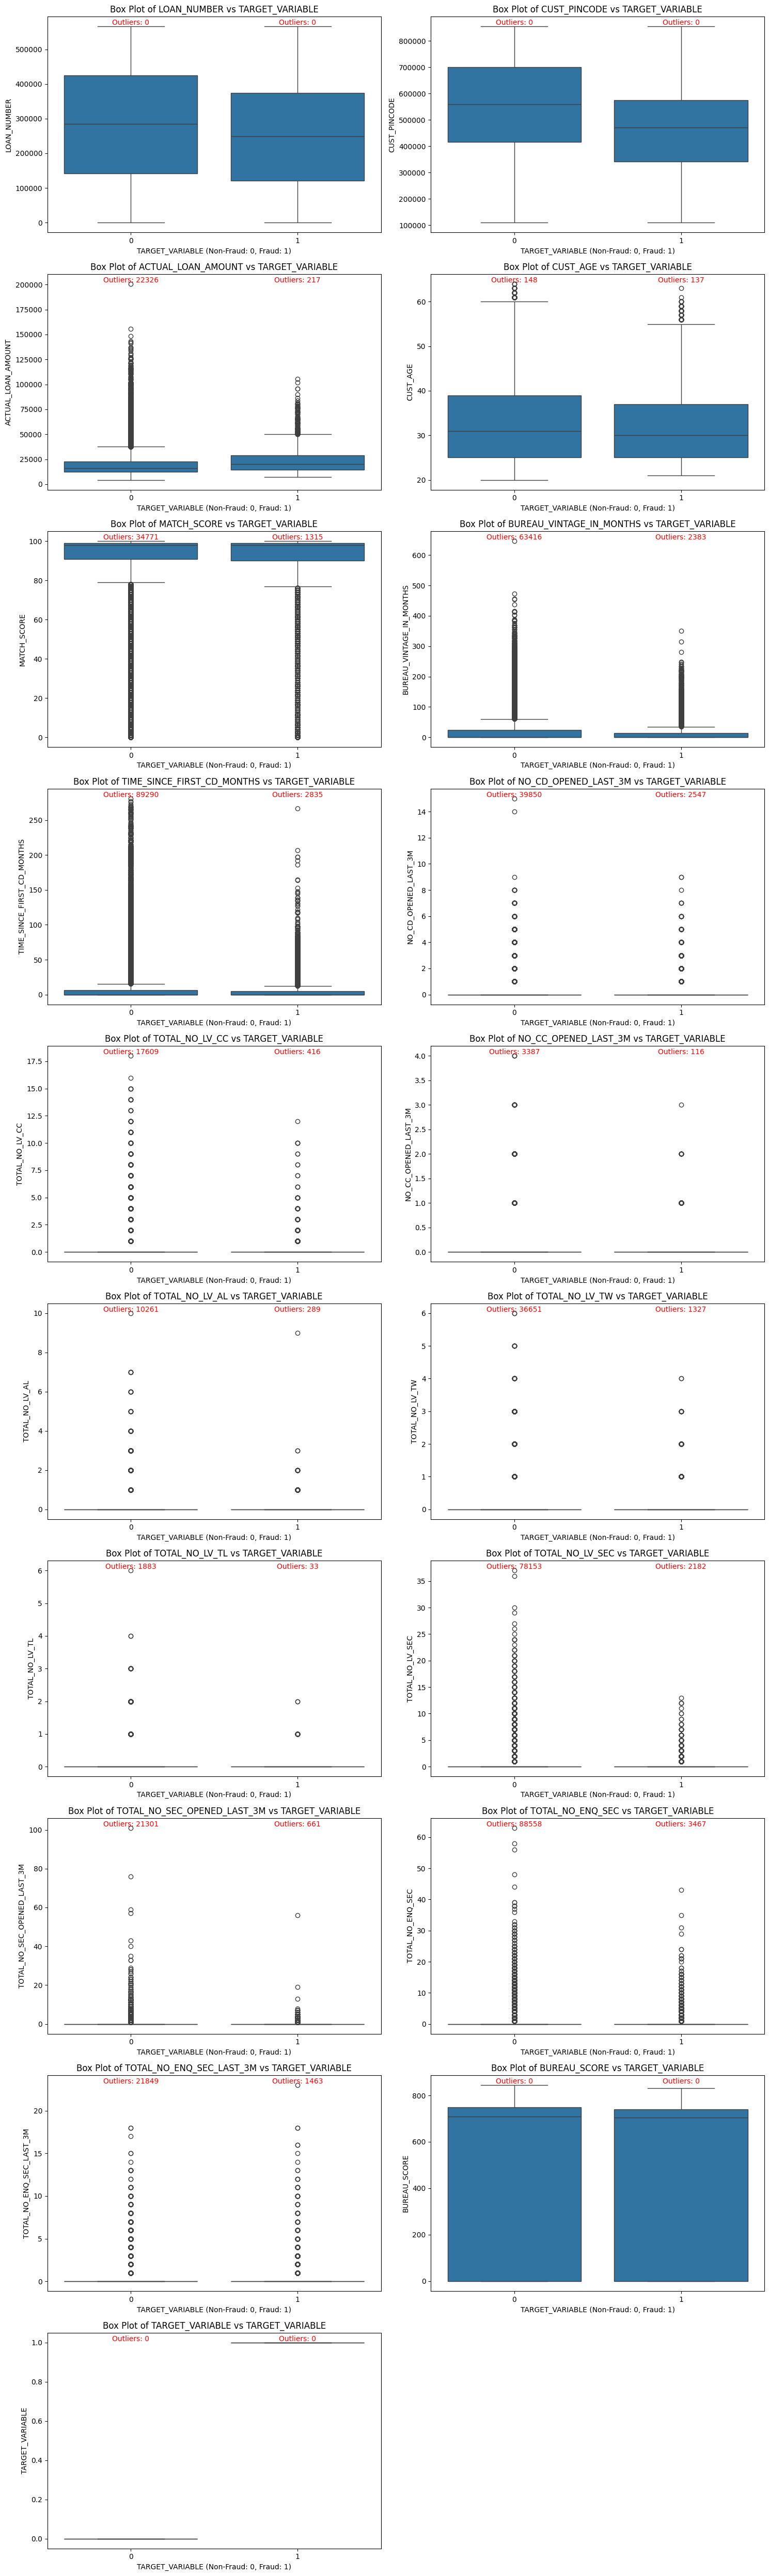

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to calculate outliers based on IQR
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers.sum()

# Select numerical columns for plotting
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set up a grid for multiple plots
num_cols = 2  # Number of columns for subplots
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create a box plot for each feature
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=df_cleaned, x='TARGET_VARIABLE', y=col, ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col} vs TARGET_VARIABLE')
    axes[idx].set_xlabel('TARGET_VARIABLE (Non-Fraud: 0, Fraud: 1)')
    axes[idx].set_ylabel(col)

    # Calculate and annotate the number of outliers
    outlier_counts = df_cleaned.groupby('TARGET_VARIABLE')[col].apply(count_outliers)
    for i, count in enumerate(outlier_counts):
        axes[idx].text(
            x=i,
            y=df_cleaned[col].max(),
            s=f'Outliers: {count}',
            ha='center',
            va='bottom',
            color='red',
            fontsize=10
        )

# Remove any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
def handle_outliers_with_mean(df, feature, target_col, target_value=None):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_thresh_low = Q1 - 1.5 * IQR
    outlier_thresh_high = Q3 + 1.5 * IQR

    if target_value is not None:
        outliers = df[(df[feature] < outlier_thresh_low) | (df[feature] > outlier_thresh_high) & (df[target_col] == target_value)]
    else:
        outliers = df[(df[feature] < outlier_thresh_low) | (df[feature] > outlier_thresh_high)]

    mean_val = df[feature].mean()
    df.loc[outliers.index, feature] = mean_val  # Replace outliers with mean
    print(f"Replaced outliers in {feature} with mean value: {mean_val}")

    return df

# Apply for BUREAU_VINTAGE_IN_MONTHS for target = 0 and 1
df_cleaned = handle_outliers_with_mean(df_cleaned, 'BUREAU_VINTAGE_IN_MONTHS', 'TARGET_VARIABLE', target_value=0)
df_cleaned = handle_outliers_with_mean(df_cleaned, 'BUREAU_VINTAGE_IN_MONTHS', 'TARGET_VARIABLE', target_value=1)
df_cleaned = handle_outliers_with_mean(df_cleaned, 'TIME_SINCE_FIRST_CD_MONTHS', 'TARGET_VARIABLE')
df_cleaned = handle_outliers_with_mean(df_cleaned, 'NO_CD_OPENED_LAST_3M', 'TARGET_VARIABLE', target_value=1)
df_cleaned = handle_outliers_with_mean(df_cleaned, 'TOTAL_NO_LV_SEC', 'TARGET_VARIABLE')
df_cleaned = handle_outliers_with_mean(df_cleaned, 'TOTAL_NO_ENQ_SEC', 'TARGET_VARIABLE')


Replaced outliers in BUREAU_VINTAGE_IN_MONTHS with mean value: 19.382708416504446
Replaced outliers in BUREAU_VINTAGE_IN_MONTHS with mean value: 10.203816338647533
Replaced outliers in TIME_SINCE_FIRST_CD_MONTHS with mean value: 7.773097427672045
Replaced outliers in NO_CD_OPENED_LAST_3M with mean value: 0.09623354095198391
Replaced outliers in TOTAL_NO_LV_SEC with mean value: 0.23138233039275607
Replaced outliers in TOTAL_NO_ENQ_SEC with mean value: 0.3718305181751698


<ipython-input-13-de8956ff3daa>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.382708416504446' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, feature] = mean_val  # Replace outliers with mean
<ipython-input-13-de8956ff3daa>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.773097427672045' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, feature] = mean_val  # Replace outliers with mean
<ipython-input-13-de8956ff3daa>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.09623354095198391' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, feature] 

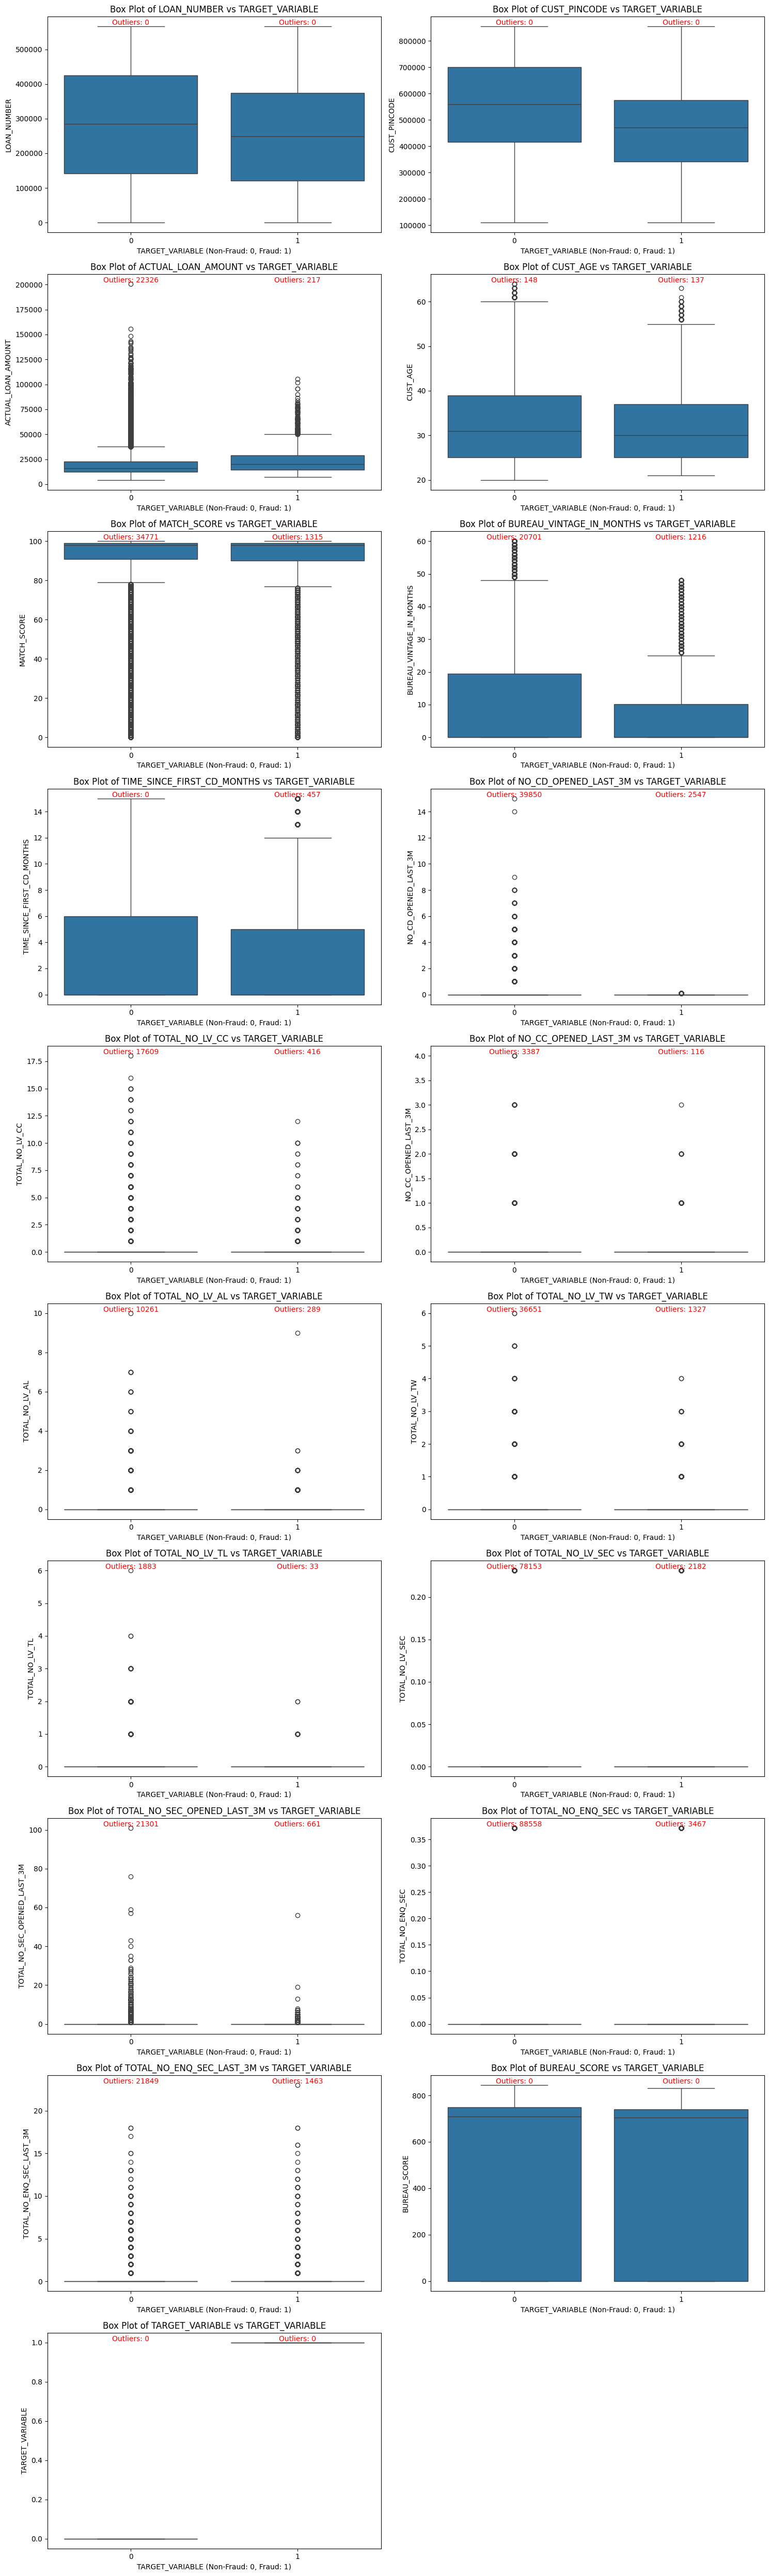

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to calculate outliers based on IQR
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers.sum()

# Select numerical columns for plotting
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set up a grid for multiple plots
num_cols = 2  # Number of columns for subplots
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create a box plot for each feature
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=df_cleaned, x='TARGET_VARIABLE', y=col, ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col} vs TARGET_VARIABLE')
    axes[idx].set_xlabel('TARGET_VARIABLE (Non-Fraud: 0, Fraud: 1)')
    axes[idx].set_ylabel(col)

    # Calculate and annotate the number of outliers
    outlier_counts = df_cleaned.groupby('TARGET_VARIABLE')[col].apply(count_outliers)
    for i, count in enumerate(outlier_counts):
        axes[idx].text(
            x=i,
            y=df_cleaned[col].max(),
            s=f'Outliers: {count}',
            ha='center',
            va='bottom',
            color='red',
            fontsize=10
        )

# Remove any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


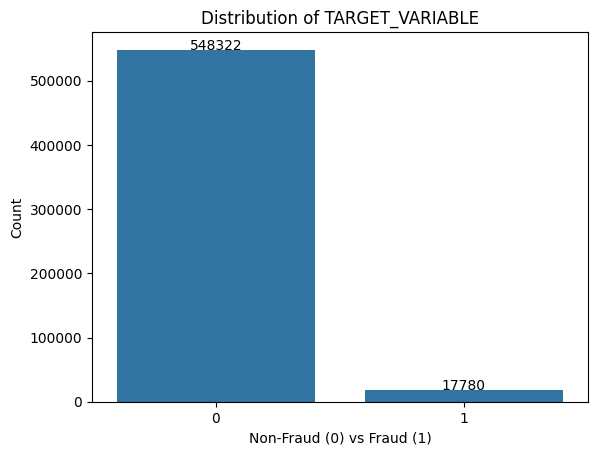

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot
sns.countplot(data=df_cleaned, x='TARGET_VARIABLE')
plt.title('Distribution of TARGET_VARIABLE')
plt.xlabel('Non-Fraud (0) vs Fraud (1)')
plt.ylabel('Count')

# Add numerical values above bars
for p in plt.gca().patches:  # Access the bars (patches) in the plot
    plt.text(
        p.get_x() + p.get_width() / 2,  # x-coordinate of the text (center of the bar)
        p.get_height() + 50,  # y-coordinate (just above the bar)
        f'{int(p.get_height())}',  # Text to display (count)
        ha='center'  # Horizontal alignment
    )

plt.show()

In [ ]:
print("Initial Data Preview:\n", df_cleaned.head())
print("\nData Summary:\n", df_cleaned.info())

Initial Data Preview:
     DISBMONTH  LOAN_NUMBER CD_SEGMENT PRODUCT_CODE ETC_NTC PAYMENT_TYPE  \
0  10-31-2022            1     MOBILE       MOBILE     NTC          ADM   
1  11-30-2022            2     MOBILE       MOBILE     ETC          ADM   
2  10-31-2022            3     MOBILE       MOBILE     ETC         ENCH   
3  10-31-2022            4     MOBILE       MOBILE     ETC          ADM   
4  10-31-2022            5     MOBILE       MOBILE     ETC          ADM   

   CUST_PINCODE CUST_STATE MANUFACTURE_CODE  ACTUAL_LOAN_AMOUNT  ...  \
0      517551.0         AP             OPPO             14939.0  ...   
1      517002.0         AP          SAMSUNG             26100.0  ...   
2      517132.0         AP             OPPO             22949.0  ...   
3      517130.0         AP             OPPO             11648.0  ...   
4      515212.0         AP             OPPO             20227.0  ...   

  NO_CC_OPENED_LAST_3M TOTAL_NO_LV_AL TOTAL_NO_LV_TW TOTAL_NO_LV_TL  \
0                    0

In [ ]:
import pandas as pd
# Step 1: Filter the dataset and count target values
def calculate_pincode_counts(df_cleaned):
    # Filter rows where TARGET_VARIABLE == 1
    df_filtered = df_cleaned[df_cleaned['TARGET_VARIABLE'] == 1]

    # Group by pin code and count occurrences
    pincode_counts = df_filtered.groupby('CUST_PINCODE').size().reset_index(name='Count')
    return pincode_counts



# Step 4: Main execution
if __name__ == "__main__":

    # Calculate pin code counts
    pincode_counts = calculate_pincode_counts(df_cleaned)

    # Save the DataFrame as a CSV file
    pincode_counts.to_csv('pincode_counts.csv', index=False)

    print("pincode_counts has been saved as both CSV files.")



pincode_counts has been saved as both CSV files.


In [ ]:
pip install matplotlib

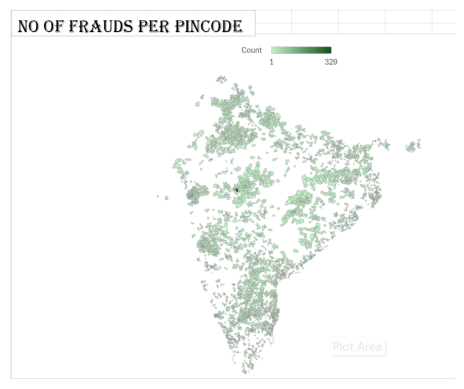

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread("indianpincodevsfraudcount.png")

# Display the image
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

                         STATE  \
0  ANDAMAN AND NICOBAR ISLANDS   
1               ANDHRA PRADESH   
2            ARUNACHAL PRADESH   
3                        ASSAM   
4                        BIHAR   

                                            geometry  
0  MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...  
1  POLYGON ((82.00063 17.95354, 82.11718 18.02457...  
2  POLYGON ((95.61476 27.34745, 95.69234 27.33888...  
3  POLYGON ((92.82207 25.57781, 92.69672 25.61368...  
4  POLYGON ((84.16946 26.28322, 83.91399 26.38523...  
Index(['STATE', 'geometry'], dtype='object')
Sample data in df_cleaned:
       CUST_STATE full_state_name
0              AP  Andhra Pradesh
46020          AS           Assam
50329          BH           Bihar
75959          CH      Chandigarh
75967          CT    Chhattisgarh
93157          DL           Delhi
101179         GA             Goa
104191         GJ         Gujarat
121915         HR         Haryana
139466         JH       Jharkhand
162648         KA  

<Figure size 1400x1000 with 0 Axes>

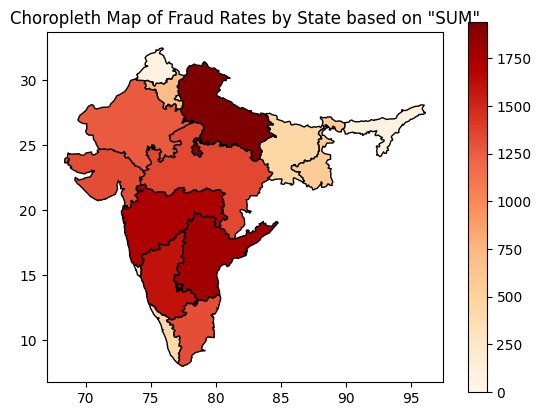

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of Indian states
india_map = gpd.read_file('india_st.shp')

# Inspect the first few rows and column names of the GeoDataFrame
print(india_map.head())
print(india_map.columns)

import geopandas as gpd
import matplotlib.pyplot as plt

# Mapping of state abbreviations to full names
state_mapping = {
    'AP': 'Andhra Pradesh', 'AS': 'Assam', 'BH': 'Bihar', 'CH': 'Chandigarh',
    'CT': 'Chhattisgarh', 'DL': 'Delhi', 'GA': 'Goa', 'GJ': 'Gujarat',
    'HR': 'Haryana', 'JH': 'Jharkhand', 'KA': 'Karnataka', 'KL': 'Kerala',
    'MH': 'Maharashtra', 'MP': 'Madhya Pradesh', 'OR': 'Odisha', 'PB': 'Punjab',
    'PY': 'Puducherry', 'RJ': 'Rajasthan', 'TN': 'Tamil Nadu', 'TS': 'Telangana',
    'UK': 'Uttarakhand', 'UP': 'Uttar Pradesh', 'WB': 'West Bengal'
}

# Add full state names to df
df_cleaned['full_state_name'] = df_cleaned['CUST_STATE'].map(state_mapping)

# Print sample data
print("Sample data in df_cleaned:")
print(df_cleaned[['CUST_STATE', 'full_state_name']].drop_duplicates())

# Load the shapefile of Indian states
india_map = gpd.read_file('india_st.shp')

# Normalize state names to match the STATE column format
df_cleaned['full_state_name'] = df_cleaned['full_state_name'].str.upper().str.strip()
india_map['STATE'] = india_map['STATE'].str.upper().str.strip()

# Print sample data in india_map
print("Sample data in india_map:")
print(india_map[['STATE']].head())

# Aggregate fraud data by state
fraud_by_state = df_cleaned.groupby('full_state_name')['TARGET_VARIABLE'].sum().reset_index()

# Print sample aggregated fraud data
print("Sample aggregated fraud data:")
print(fraud_by_state.head())

# Merge the fraud data with the map data
india_fraud_map = india_map.merge(fraud_by_state, left_on='STATE', right_on='full_state_name', how='left')

# Print the merged GeoDataFrame
print("Sample merged GeoDataFrame:")
print(india_fraud_map.head())

# Plotting the choropleth map
plt.figure(figsize=(14, 10))
india_fraud_map.plot(column='TARGET_VARIABLE', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Choropleth Map of Fraud Rates by State based on "SUM"')
plt.show()

Sample aggregated fraud data:
  full_state_name  TARGET_VARIABLE
0  ANDHRA PRADESH         0.038787
1           ASSAM         0.019494
2           BIHAR         0.017519
3      CHANDIGARH         0.000000
4    CHHATTISGARH         0.026702
Sample merged GeoDataFrame:
                         STATE  \
0  ANDAMAN AND NICOBAR ISLANDS   
1               ANDHRA PRADESH   
2            ARUNACHAL PRADESH   
3                        ASSAM   
4                        BIHAR   

                                            geometry full_state_name  \
0  MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...             NaN   
1  POLYGON ((82.00063 17.95354, 82.11718 18.02457...  ANDHRA PRADESH   
2  POLYGON ((95.61476 27.34745, 95.69234 27.33888...             NaN   
3  POLYGON ((92.82207 25.57781, 92.69672 25.61368...           ASSAM   
4  POLYGON ((84.16946 26.28322, 83.91399 26.38523...           BIHAR   

   TARGET_VARIABLE  
0              NaN  
1         0.038787  
2              NaN  
3         

<Figure size 1400x1000 with 0 Axes>

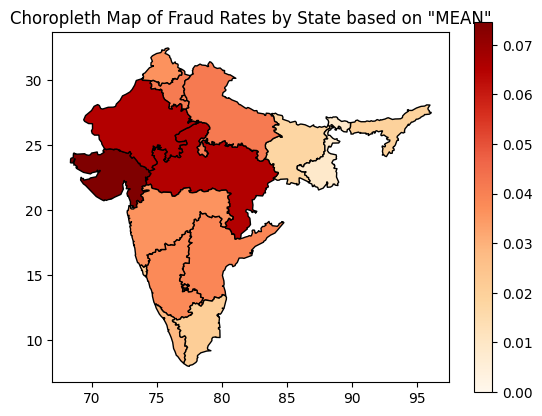

In [ ]:

# Aggregate fraud data by state
fraud_by_state = df_cleaned.groupby('full_state_name')['TARGET_VARIABLE'].mean().reset_index()

# Print sample aggregated fraud data
print("Sample aggregated fraud data:")
print(fraud_by_state.head())

# Merge the fraud data with the map data
india_fraud_map = india_map.merge(fraud_by_state, left_on='STATE', right_on='full_state_name', how='left')

# Print the merged GeoDataFrame
print("Sample merged GeoDataFrame:")
print(india_fraud_map.head())

# Plotting the choropleth map
plt.figure(figsize=(14, 10))
india_fraud_map.plot(column='TARGET_VARIABLE', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Choropleth Map of Fraud Rates by State based on "MEAN"')
plt.show()

In [ ]:
df_cleaned.drop('full_state_name',axis=1,inplace=True)

In [ ]:
print(df_cleaned.columns)

Index(['DISBMONTH', 'LOAN_NUMBER', 'CD_SEGMENT', 'PRODUCT_CODE', 'ETC_NTC',
       'PAYMENT_TYPE', 'CUST_PINCODE', 'CUST_STATE', 'MANUFACTURE_CODE',
       'ACTUAL_LOAN_AMOUNT', 'PAYNIMO_STATUS', 'QUALIFICATION', 'GENDER',
       'MARITALSTATUS', 'CUST_AGE', 'EMP_GRP', 'MATCH_SCORE',
       'BUREAU_VINTAGE_IN_MONTHS', 'TIME_SINCE_FIRST_CD_MONTHS',
       'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC', 'NO_CC_OPENED_LAST_3M',
       'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW', 'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC',
       'TOTAL_NO_SEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ_SEC',
       'TOTAL_NO_ENQ_SEC_LAST_3M', 'BUREAU_SCORE', 'TARGET_VARIABLE'],
      dtype='object')


Proportion of Fraud Cases by Gender (%):
GENDER
M    3.254432
F    2.750814
Name: count, dtype: float64
Fraud Percentage by Gender:
GENDER
M    80.23622
F    19.76378
Name: proportion, dtype: float64


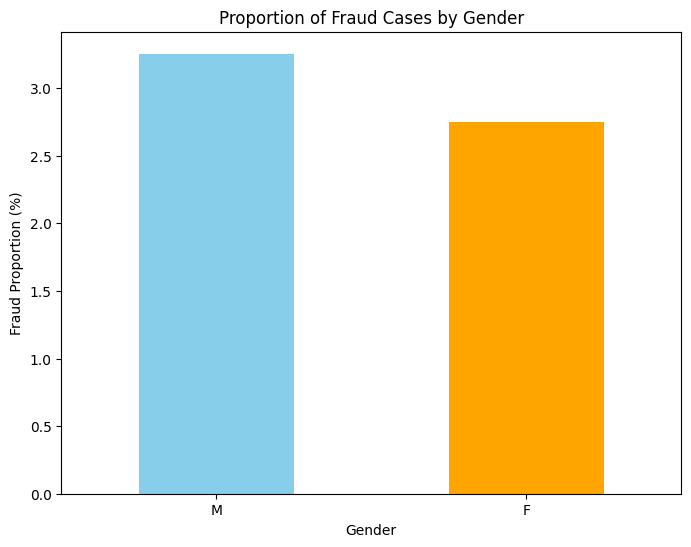

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the total number of individuals by gender
total_by_gender = df_cleaned['GENDER'].value_counts()

# Group the number of fraud cases by gender
fraud_by_gender = df_cleaned[df_cleaned['TARGET_VARIABLE'] == 1]['GENDER'].value_counts()

# Calculate the proportion of fraud cases for each gender
fraud_proportion_by_gender = (fraud_by_gender / total_by_gender) * 100

# Print the proportion of fraud cases by gender
print("Proportion of Fraud Cases by Gender (%):")
print(fraud_proportion_by_gender)
fraud_cases = df_cleaned[df_cleaned['TARGET_VARIABLE'] == 1]
fraud_by_gender = fraud_cases['GENDER'].value_counts(normalize=True) * 100  # Normalize gives percentage

# Print fraud percentages by gender
print("Fraud Percentage by Gender:")
print(fraud_by_gender)
# Visualization
plt.figure(figsize=(8, 6))
fraud_proportion_by_gender.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Proportion of Fraud Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Fraud Proportion (%)")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Group by CD_SEGMENT and calculate fraud rates as percentages
fraud_by_cd_segment = df_cleaned.groupby('CD_SEGMENT')['TARGET_VARIABLE'].mean() * 100

# Reset the index for better readability
fraud_by_cd_segment = fraud_by_cd_segment.reset_index()

# Sort values by fraud rate in descending order
fraud_by_cd_segment = fraud_by_cd_segment.sort_values(by='TARGET_VARIABLE', ascending=False)

# Rename the column for clarity
fraud_by_cd_segment.rename(columns={'TARGET_VARIABLE': 'Fraud_Rate (%)'}, inplace=True)

# Display the result
print("Fraud Rates by Consumer Durable Segment (%):")
print(fraud_by_cd_segment)


Fraud Rates by Consumer Durable Segment (%):
   CD_SEGMENT  Fraud_Rate (%)
0      MOBILE        3.317963
1  Non-Mobile        2.921764


In [ ]:
# Replace 'mobile' with 1 and 'non-mobile' with 2
df_cleaned['CD_SEGMENT'] = df_cleaned['CD_SEGMENT'].replace({'mobile': 1, 'non-mobile': 2})

# Verify the changes
print(df_cleaned['CD_SEGMENT'].value_counts())

CD_SEGMENT
MOBILE        312933
Non-Mobile    253169
Name: count, dtype: int64


In [ ]:
# Filter only the fraud cases where TARGET_VARIABLE == 1
fraud_cases = df_cleaned[df_cleaned['TARGET_VARIABLE'] == 1]

# Group by ETC_NTC and count the number of fraud cases
fraud_by_credit_status = fraud_cases['ETC_NTC'].value_counts()

# Print the results
print("Number of fraud cases by ETC_NTC:")
print(fraud_by_credit_status)
print((df_cleaned['ETC_NTC'].value_counts()/566102)*100)
# Optionally, calculate the percentage distribution
fraud_percentage = (fraud_by_credit_status / fraud_cases.shape[0]) * 100
print("\nPercentage of fraud cases by ETC_NTC:")
print(fraud_percentage)


Number of fraud cases by ETC_NTC:
ETC_NTC
NTC    9250
ETC    8530
Name: count, dtype: int64
ETC_NTC
NTC    53.446729
ETC    46.553271
Name: count, dtype: float64

Percentage of fraud cases by ETC_NTC:
ETC_NTC
NTC    52.024747
ETC    47.975253
Name: count, dtype: float64


In [ ]:
# Group by CD_SEGMENT and calculate fraud rates as percentages
fraud_by_cd_segment = df_cleaned.groupby('PAYMENT_TYPE')['TARGET_VARIABLE'].mean() * 100

# Reset the index for better readability
fraud_by_cd_segment = fraud_by_cd_segment.reset_index()

# Sort values by fraud rate in descending order
fraud_by_cd_segment = fraud_by_cd_segment.sort_values(by='TARGET_VARIABLE', ascending=False)

# Rename the column for clarity
fraud_by_cd_segment.rename(columns={'TARGET_VARIABLE': 'Fraud_Rate (%)'}, inplace=True)

# Display the result
print("Fraud Rates by Consumer Durable Segment (%):")
print(fraud_by_cd_segment)
# Count the occurrences of each payment type
payment_type_counts = df_cleaned['PAYMENT_TYPE'].value_counts()

# Print the counts
print("Count of each PAYMENT_TYPE:")
print(payment_type_counts)

Fraud Rates by Consumer Durable Segment (%):
  PAYMENT_TYPE  Fraud_Rate (%)
0          ACH        3.949187
1          ADM        3.137091
2         ENCH        2.738449
3          UPI        0.000000
Count of each PAYMENT_TYPE:
PAYMENT_TYPE
ADM     270601
ENCH    196352
ACH      99109
UPI         38
Name: count, dtype: int64


In [ ]:
# Group by PAYMENT_TYPE and calculate the number of fraud cases
fraud_count_by_payment_type = df_cleaned[df_cleaned['TARGET_VARIABLE'] == 1].groupby('PAYMENT_TYPE').size()

# Reset index for readability
fraud_count_by_payment_type = fraud_count_by_payment_type.reset_index(name='Fraud_Cases_Count')

# Sort by Fraud Cases Count
fraud_count_by_payment_type = fraud_count_by_payment_type.sort_values(by='Fraud_Cases_Count', ascending=False)

# Display the result
print("Number of Fraud Cases by PAYMENT_TYPE:")
print(fraud_count_by_payment_type)


Number of Fraud Cases by PAYMENT_TYPE:
  PAYMENT_TYPE  Fraud_Cases_Count
1          ADM               8489
2         ENCH               5377
0          ACH               3914


In [ ]:
import pandas as pd

# Step 1: Get the feature names from the preprocessor
# Numerical feature names remain the same as before transformation
numerical_column_names = numerical_features

# Categorical feature names after one-hot encoding
categorical_column_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Step 2: Combine numerical and categorical feature names
all_feature_names = list(numerical_column_names) + list(categorical_column_names)

# Step 3: Convert the resampled features (X_resampled) back into a DataFrame
X_resampled_df = pd.DataFrame(X_balanced, columns=all_feature_names)

# Step 4: Convert the resampled target variable (y_resampled) into a DataFrame
y_resampled_df = pd.DataFrame(y_balanced, columns=['TARGET_VARIABLE'])

# Step 5: Combine resampled features and target variable into one DataFrame
df_balanced = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Display the first few rows of the balanced DataFrame to verify
print(df_balanced.head())


      TENUR  ADVANCE_EMI_COUNT       LTV  ACTUAL_LOAN_AMOUNT  DOWN_PAYMENT  \
0  0.911488           1.499121 -1.105667           -0.720041      0.253545   
1  0.911488           1.499121 -1.511350           -1.131352     -0.288752   
2 -0.942559          -0.527228  0.618485           -0.402270     -0.632293   
3 -1.313368          -1.202678  0.746166            0.656817     -0.389421   
4  0.169870          -0.527228  1.020546           -0.342431     -0.844894   

   CUST_AGE   MATCH_SCORE  BUREAU_VINTAGE_IN_MONTHS  \
0 -1.216577 -9.106365e-16                 -0.548882   
1  0.830516  6.270018e-01                 -0.548882   
2 -1.102849 -9.106365e-16                  0.130753   
3 -1.216577  7.551625e-01                 -0.548882   
4  1.740335 -9.106365e-16                  0.045799   

   TIME_SINCE_FIRST_CD_MONTHS  NO_CD_OPENED_LAST_3M  ...  CUST_STATE_OR  \
0                   -0.438336             -0.249265  ...            0.0   
1                   -0.438336             -0.24926

In [ ]:
print(df_balanced.columns)

Index(['TENUR', 'ADVANCE_EMI_COUNT', 'LTV', 'ACTUAL_LOAN_AMOUNT',
       'DOWN_PAYMENT', 'CUST_AGE', 'MATCH_SCORE', 'BUREAU_VINTAGE_IN_MONTHS',
       'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC',
       'NO_CC_OPENED_LAST_3M', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW',
       'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M',
       'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ_CD',
       'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M', 'BUREAU_SCORE',
       'DISBMONTH_10-31-2022', 'DISBMONTH_10-31-2023', 'DISBMONTH_11-30-2022',
       'DISBMONTH_11-30-2023', 'DISBMONTH_12-31-2022', 'DISBMONTH_12-31-2023',
       'DISBMONTH_2-28-2023', 'DISBMONTH_3-31-2023', 'DISBMONTH_4-30-2023',
       'DISBMONTH_5-31-2023', 'DISBMONTH_6-30-2023', 'DISBMONTH_7-31-2023',
       'DISBMONTH_8-31-2023', 'DISBMONTH_9-30-2023', 'CD_SEGMENT_Non-Mobile',
       'PRODUCT_CODE_AIR', 'PRODUCT_CODE_COOLER', 'PRODUCT_CODE_DSW',
       'PRODUCT_CODE_FRIDG

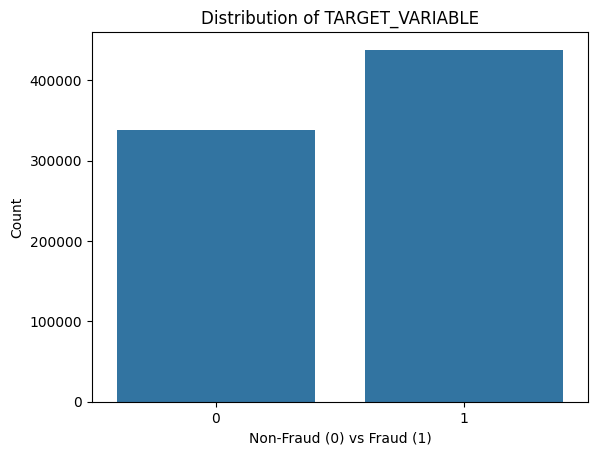

In [ ]:
sns.countplot(data=df_balanced, x='TARGET_VARIABLE')
plt.title('Distribution of TARGET_VARIABLE')
plt.xlabel('Non-Fraud (0) vs Fraud (1)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Step 3: Correlation Analysis
# Correlation matrix
correlation_matrix = df_balanced.corr(numeric_only=True)  # Include numeric_only parameter

# Correlation with TARGET_VARIABLE (using absolute values)
corr_with_target = correlation_matrix['TARGET_VARIABLE'].abs().sort_values(ascending=False)

# Print the absolute correlation with TARGET_VARIABLE
print("Absolute Correlation with TARGET_VARIABLE:\n", corr_with_target)


Absolute Correlation with TARGET_VARIABLE:
 TARGET_VARIABLE         1.000000
CUST_STATE_WB           0.215342
ACTUAL_LOAN_AMOUNT      0.203065
TOTAL_NO_ENQ_CD         0.180483
PRODUCT_CODE_FRIDGE     0.168289
                          ...   
DISBMONTH_12-31-2022    0.003226
DISBMONTH_7-31-2023     0.002934
CUST_STATE_CH           0.002886
PRODUCT_CODE_HOBB       0.001825
DISBMONTH_2-28-2023     0.000656
Name: TARGET_VARIABLE, Length: 79, dtype: float64


In [ ]:
print(len(df_balanced.columns))
print(df_balanced.columns)

79
Index(['TENUR', 'ADVANCE_EMI_COUNT', 'LTV', 'ACTUAL_LOAN_AMOUNT',
       'DOWN_PAYMENT', 'CUST_AGE', 'MATCH_SCORE', 'BUREAU_VINTAGE_IN_MONTHS',
       'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC',
       'NO_CC_OPENED_LAST_3M', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW',
       'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M',
       'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ_CD',
       'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M', 'BUREAU_SCORE',
       'DISBMONTH_10-31-2022', 'DISBMONTH_10-31-2023', 'DISBMONTH_11-30-2022',
       'DISBMONTH_11-30-2023', 'DISBMONTH_12-31-2022', 'DISBMONTH_12-31-2023',
       'DISBMONTH_2-28-2023', 'DISBMONTH_3-31-2023', 'DISBMONTH_4-30-2023',
       'DISBMONTH_5-31-2023', 'DISBMONTH_6-30-2023', 'DISBMONTH_7-31-2023',
       'DISBMONTH_8-31-2023', 'DISBMONTH_9-30-2023', 'CD_SEGMENT_Non-Mobile',
       'PRODUCT_CODE_AIR', 'PRODUCT_CODE_COOLER', 'PRODUCT_CODE_DSW',
       'PRODUCT_CODE_FR

In [ ]:
# # List of one-hot encoded CUST_STATE columns
# cust_state_columns = [
#     'CUST_STATE_AS', 'CUST_STATE_BH', 'CUST_STATE_CH', 'CUST_STATE_CT',
#     'CUST_STATE_DL', 'CUST_STATE_GA', 'CUST_STATE_GJ', 'CUST_STATE_HR',
#     'CUST_STATE_JH', 'CUST_STATE_KA', 'CUST_STATE_KL', 'CUST_STATE_MH',
#     'CUST_STATE_MP', 'CUST_STATE_OR', 'CUST_STATE_PB', 'CUST_STATE_PY',
#     'CUST_STATE_RJ', 'CUST_STATE_TN', 'CUST_STATE_TS', 'CUST_STATE_UK',
#     'CUST_STATE_UP', 'CUST_STATE_WB'
# ]

# # Print the head of the specified features
# print(df_balanced[cust_state_columns].head())
# List of one-hot encoded CUST_STATE columns
cust_state_columns = [
    'CUST_STATE_AS', 'CUST_STATE_BH', 'CUST_STATE_CH', 'CUST_STATE_CT',
    'CUST_STATE_DL', 'CUST_STATE_GA', 'CUST_STATE_GJ', 'CUST_STATE_HR',
    'CUST_STATE_JH', 'CUST_STATE_KA', 'CUST_STATE_KL', 'CUST_STATE_MH',
    'CUST_STATE_MP', 'CUST_STATE_OR', 'CUST_STATE_PB', 'CUST_STATE_PY',
    'CUST_STATE_RJ', 'CUST_STATE_TN', 'CUST_STATE_TS', 'CUST_STATE_UK',
    'CUST_STATE_UP', 'CUST_STATE_WB'
]

# Combine one-hot encoded CUST_STATE columns into a single column with state names
df_balanced['CUST_STATE'] = df_balanced[cust_state_columns].idxmax(axis=1)

# Remove the prefix 'CUST_STATE_' to get the state names only
df_balanced['CUST_STATE'] = df_balanced['CUST_STATE'].str.replace('CUST_STATE_', '', regex=False)

# Optionally, you may want to remove the one-hot encoded columns
df_balanced = df_balanced.drop(columns=cust_state_columns)

# Print the updated DataFrame head
print(df_balanced.head())


      TENUR  ADVANCE_EMI_COUNT       LTV  ACTUAL_LOAN_AMOUNT  DOWN_PAYMENT  \
0  0.911488           1.499121 -1.105667           -0.720041      0.253545   
1  0.911488           1.499121 -1.511350           -1.131352     -0.288752   
2 -0.942559          -0.527228  0.618485           -0.402270     -0.632293   
3 -1.313368          -1.202678  0.746166            0.656817     -0.389421   
4  0.169870          -0.527228  1.020546           -0.342431     -0.844894   

   CUST_AGE   MATCH_SCORE  BUREAU_VINTAGE_IN_MONTHS  \
0 -1.216577 -9.106365e-16                 -0.548882   
1  0.830516  6.270018e-01                 -0.548882   
2 -1.102849 -9.106365e-16                  0.130753   
3 -1.216577  7.551625e-01                 -0.548882   
4  1.740335 -9.106365e-16                  0.045799   

   TIME_SINCE_FIRST_CD_MONTHS  NO_CD_OPENED_LAST_3M  ...  PRODUCT_CODE_TABLET  \
0                   -0.438336             -0.249265  ...                  0.0   
1                   -0.438336         

In [ ]:
# Get the dimensions of the DataFrame
dimensions = df_balanced.shape

# Print the dimensions
print("Dimensions of df_balanced:", dimensions)

Dimensions of df_balanced: (776508, 58)


In [ ]:
print(len(df_balanced.columns))
print(df_balanced.columns)

58
Index(['TENUR', 'ADVANCE_EMI_COUNT', 'LTV', 'ACTUAL_LOAN_AMOUNT',
       'DOWN_PAYMENT', 'CUST_AGE', 'MATCH_SCORE', 'BUREAU_VINTAGE_IN_MONTHS',
       'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC',
       'NO_CC_OPENED_LAST_3M', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW',
       'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M',
       'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ_CD',
       'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M', 'BUREAU_SCORE',
       'DISBMONTH_10-31-2022', 'DISBMONTH_10-31-2023', 'DISBMONTH_11-30-2022',
       'DISBMONTH_11-30-2023', 'DISBMONTH_12-31-2022', 'DISBMONTH_12-31-2023',
       'DISBMONTH_2-28-2023', 'DISBMONTH_3-31-2023', 'DISBMONTH_4-30-2023',
       'DISBMONTH_5-31-2023', 'DISBMONTH_6-30-2023', 'DISBMONTH_7-31-2023',
       'DISBMONTH_8-31-2023', 'DISBMONTH_9-30-2023', 'CD_SEGMENT_Non-Mobile',
       'PRODUCT_CODE_AIR', 'PRODUCT_CODE_COOLER', 'PRODUCT_CODE_DSW',
       'PRODUCT_CODE_FR

In [ ]:
print(len(df_balanced.columns))
print(df_balanced.columns)

58
Index(['TENUR', 'ADVANCE_EMI_COUNT', 'LTV', 'ACTUAL_LOAN_AMOUNT',
       'DOWN_PAYMENT', 'CUST_AGE', 'MATCH_SCORE', 'BUREAU_VINTAGE_IN_MONTHS',
       'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC',
       'NO_CC_OPENED_LAST_3M', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW',
       'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M',
       'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ_CD',
       'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M', 'BUREAU_SCORE',
       'DISBMONTH_10-31-2022', 'DISBMONTH_10-31-2023', 'DISBMONTH_11-30-2022',
       'DISBMONTH_11-30-2023', 'DISBMONTH_12-31-2022', 'DISBMONTH_12-31-2023',
       'DISBMONTH_2-28-2023', 'DISBMONTH_3-31-2023', 'DISBMONTH_4-30-2023',
       'DISBMONTH_5-31-2023', 'DISBMONTH_6-30-2023', 'DISBMONTH_7-31-2023',
       'DISBMONTH_8-31-2023', 'DISBMONTH_9-30-2023', 'CD_SEGMENT_Non-Mobile',
       'PRODUCT_CODE_AIR', 'PRODUCT_CODE_COOLER', 'PRODUCT_CODE_DSW',
       'PRODUCT_CODE_FR

In [ ]:
# List of one-hot encoded CUST_STATE columns
PRODUCT_CODE_columns = [
   'PRODUCT_CODE_AIR', 'PRODUCT_CODE_COOLER', 'PRODUCT_CODE_DSW',
       'PRODUCT_CODE_FRIDGE', 'PRODUCT_CODE_HOBB', 'PRODUCT_CODE_HT',
       'PRODUCT_CODE_LAP', 'PRODUCT_CODE_MOBILE', 'PRODUCT_CODE_MWO',
       'PRODUCT_CODE_TAB', 'PRODUCT_CODE_TABLET', 'PRODUCT_CODE_TV',
       'PRODUCT_CODE_WAM', 'PRODUCT_CODE_WPR'
]

df_balanced = df_balanced.drop(columns=PRODUCT_CODE_columns)


In [ ]:
# List of one-hot encoded CUST_STATE columns
DISMONTH_columns = [
   'DISBMONTH_10-31-2022', 'DISBMONTH_10-31-2023', 'DISBMONTH_11-30-2022',
       'DISBMONTH_11-30-2023', 'DISBMONTH_12-31-2022', 'DISBMONTH_12-31-2023',
       'DISBMONTH_2-28-2023', 'DISBMONTH_3-31-2023', 'DISBMONTH_4-30-2023',
       'DISBMONTH_5-31-2023', 'DISBMONTH_6-30-2023', 'DISBMONTH_7-31-2023',
       'DISBMONTH_8-31-2023', 'DISBMONTH_9-30-2023'
]

df_balanced = df_balanced.drop(columns=DISMONTH_columns)


In [ ]:
# Print the number of columns in the DataFrame
print("Number of columns:", len(df_balanced.columns))

# Print the names of the columns
print("Column names:")
print(df_balanced.columns)

# Print the data types of each column
print("Column data types:")
print(df_balanced.dtypes)


Number of columns: 30
Column names:
Index(['TENUR', 'ADVANCE_EMI_COUNT', 'LTV', 'ACTUAL_LOAN_AMOUNT',
       'DOWN_PAYMENT', 'CUST_AGE', 'MATCH_SCORE', 'BUREAU_VINTAGE_IN_MONTHS',
       'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC',
       'NO_CC_OPENED_LAST_3M', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW',
       'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M',
       'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ_CD',
       'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M', 'BUREAU_SCORE',
       'CD_SEGMENT_Non-Mobile', 'ETC_NTC_NTC', 'PAYMENT_TYPE_ADM',
       'PAYMENT_TYPE_ENCH', 'PAYMENT_TYPE_UPI', 'TARGET_VARIABLE',
       'CUST_STATE'],
      dtype='object')
Column data types:
TENUR                            float64
ADVANCE_EMI_COUNT                float64
LTV                              float64
ACTUAL_LOAN_AMOUNT               float64
DOWN_PAYMENT                     float64
CUST_AGE                         float64
MATCH

In [ ]:
df_balanced = df_balanced.drop(columns='CD_SEGMENT_Non-Mobile') # Use a string literal 'CD_SEGMENT_Non-Mobile' to specify the column name.

In [ ]:
# Print the number of columns in the DataFrame
print("Number of columns:", len(df_balanced.columns))

# Print the names of the columns
print("Column names:")
print(df_balanced.columns)

# Print the data types of each column
print("Column data types:")
print(df_balanced.dtypes)


Number of columns: 29
Column names:
Index(['TENUR', 'ADVANCE_EMI_COUNT', 'LTV', 'ACTUAL_LOAN_AMOUNT',
       'DOWN_PAYMENT', 'CUST_AGE', 'MATCH_SCORE', 'BUREAU_VINTAGE_IN_MONTHS',
       'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC',
       'NO_CC_OPENED_LAST_3M', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW',
       'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M',
       'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ_CD',
       'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M', 'BUREAU_SCORE',
       'ETC_NTC_NTC', 'PAYMENT_TYPE_ADM', 'PAYMENT_TYPE_ENCH',
       'PAYMENT_TYPE_UPI', 'TARGET_VARIABLE', 'CUST_STATE'],
      dtype='object')
Column data types:
TENUR                            float64
ADVANCE_EMI_COUNT                float64
LTV                              float64
ACTUAL_LOAN_AMOUNT               float64
DOWN_PAYMENT                     float64
CUST_AGE                         float64
MATCH_SCORE                      floa

In [ ]:
# Get the dimensions of the DataFrame
dimensions = df_balanced.shape

# Print the dimensions
print("Dimensions of df_balanced:", dimensions)

Dimensions of df_balanced: (776508, 29)


In [ ]:
print(df_balanced.head())

      TENUR  ADVANCE_EMI_COUNT       LTV  ACTUAL_LOAN_AMOUNT  DOWN_PAYMENT  \
0  0.911488           1.499121 -1.105667           -0.720041      0.253545   
1  0.911488           1.499121 -1.511350           -1.131352     -0.288752   
2 -0.942559          -0.527228  0.618485           -0.402270     -0.632293   
3 -1.313368          -1.202678  0.746166            0.656817     -0.389421   
4  0.169870          -0.527228  1.020546           -0.342431     -0.844894   

   CUST_AGE   MATCH_SCORE  BUREAU_VINTAGE_IN_MONTHS  \
0 -1.216577 -9.106365e-16                 -0.548882   
1  0.830516  6.270018e-01                 -0.548882   
2 -1.102849 -9.106365e-16                  0.130753   
3 -1.216577  7.551625e-01                 -0.548882   
4  1.740335 -9.106365e-16                  0.045799   

   TIME_SINCE_FIRST_CD_MONTHS  NO_CD_OPENED_LAST_3M  ...  TOTAL_NO_ENQ_CD  \
0                   -0.438336             -0.249265  ...         0.922892   
1                   -0.438336             -0.2

In [ ]:
# Create a new DataFrame with only CUST_STATE and TARGET_VARIABLE
df_smart = df_balanced[['CUST_STATE', 'TARGET_VARIABLE']].copy()

# Print the new DataFrame head
print(df_smart.head())


  CUST_STATE  TARGET_VARIABLE
0         MH                0
1         TN                0
2         TN                0
3         TN                0
4         UP                0


Sample data in df_balanced:
      CUST_STATE full_state_name
0             MH     Maharashtra
1             TN      Tamil Nadu
4             UP   Uttar Pradesh
5             TS       Telangana
6             AS           Assam
8             KA       Karnataka
9             WB     West Bengal
10            DL           Delhi
13            OR          Odisha
19            RJ       Rajasthan
20            MP  Madhya Pradesh
24            BH           Bihar
26            HR         Haryana
37            JH       Jharkhand
41            PY      Puducherry
57            CT    Chhattisgarh
58            KL          Kerala
61            GJ         Gujarat
117           GA             Goa
142           PB          Punjab
150           UK     Uttarakhand
20529         CH      Chandigarh
Sample data in india_map:
                         STATE
0  ANDAMAN AND NICOBAR ISLANDS
1               ANDHRA PRADESH
2            ARUNACHAL PRADESH
3                        ASSAM
4                        BIHAR
S

<Figure size 1400x1000 with 0 Axes>

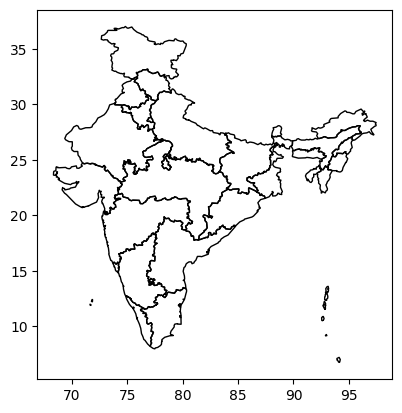

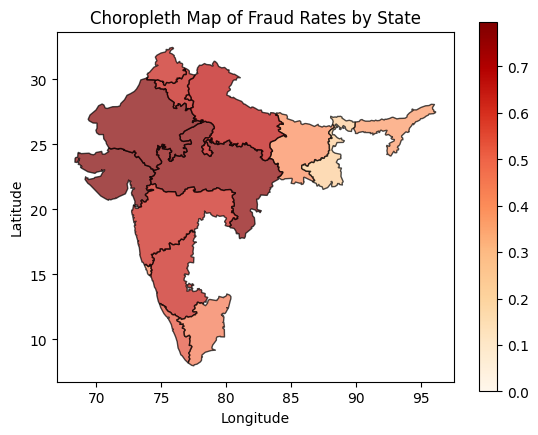

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Mapping of state abbreviations to full names
state_mapping = {
    'AP': 'Andhra Pradesh', 'AS': 'Assam', 'BH': 'Bihar', 'CH': 'Chandigarh',
    'CT': 'Chhattisgarh', 'DL': 'Delhi', 'GA': 'Goa', 'GJ': 'Gujarat',
    'HR': 'Haryana', 'JH': 'Jharkhand', 'KA': 'Karnataka', 'KL': 'Kerala',
    'MH': 'Maharashtra', 'MP': 'Madhya Pradesh', 'OR': 'Odisha', 'PB': 'Punjab',
    'PY': 'Puducherry', 'RJ': 'Rajasthan', 'TN': 'Tamil Nadu', 'TS': 'Telangana',
    'UK': 'Uttarakhand', 'UP': 'Uttar Pradesh', 'WB': 'West Bengal'
}

# Add full state names to df_balanced
df_smart['full_state_name'] = df_smart['CUST_STATE'].map(state_mapping)

# Print sample data
print("Sample data in df_balanced:")
print(df_smart[['CUST_STATE', 'full_state_name']].drop_duplicates())

# Load the shapefile of Indian states
india_map = gpd.read_file('india_st.shp')

# Normalize state names to match the `STATE` column format
df_smart['full_state_name'] = df_smart['full_state_name'].str.upper().str.strip()
india_map['STATE'] = india_map['STATE'].str.upper().str.strip()

# Print sample data in india_map
print("Sample data in india_map:")
print(india_map[['STATE']].head())

# Aggregate fraud data by state
fraud_by_state = df_smart.groupby('full_state_name')['TARGET_VARIABLE'].mean().reset_index()

# Print sample aggregated fraud data
print("Sample aggregated fraud data:")
print(fraud_by_state.head())

# Merge the fraud data with the map data
india_fraud_map = india_map.merge(fraud_by_state, left_on='STATE', right_on='full_state_name', how='left')

# Print the merged GeoDataFrame
print("Sample merged GeoDataFrame:")
print(india_fraud_map.head())

# Plotting the choropleth map with state borders preserved
plt.figure(figsize=(14, 10))
# Plot the base map with borders for all states
india_fraud_map.boundary.plot(color='black', linewidth=1)

# Plot the choropleth
india_fraud_map.plot(column='TARGET_VARIABLE', cmap='OrRd', legend=True, edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title('Choropleth Map of Fraud Rates by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
# Assuming df_balanced already exists and contains 'CUST_STATE' and 'TARGET_VARIABLE'

# Mapping of state abbreviations to numeric values
state_number_mapping = {
    'AP': 1, 'AS': 2, 'BH': 3, 'CH': 4,
    'CT': 5, 'DL': 6, 'GA': 7, 'GJ': 8,
    'HR': 9, 'JH': 10, 'KA': 11, 'KL': 12,
    'MH': 13, 'MP': 14, 'OR': 15, 'PB': 16,
    'PY': 17, 'RJ': 18, 'TN': 19, 'TS': 20,
    'UK': 21, 'UP': 22, 'WB': 23
}

# Convert CUST_STATE to numeric values using the state_number_mapping
df_balanced['CUST_STATE_NUM'] = df_balanced['CUST_STATE'].map(state_number_mapping)

# Remove the original CUST_STATE column
df_balanced = df_balanced.drop(columns=['CUST_STATE'])

# Create a new DataFrame df_smart with only CUST_STATE_NUM and TARGET_VARIABLE
df_smart = df_balanced[['CUST_STATE_NUM', 'TARGET_VARIABLE']].copy()

# Print the updated DataFrame head
print("Updated df_balanced:")
print(df_balanced.head())

print("\nNew df_smart:")
print(df_smart.head())


Updated df_balanced:
      TENUR  ADVANCE_EMI_COUNT       LTV  ACTUAL_LOAN_AMOUNT  DOWN_PAYMENT  \
0  0.911488           1.499121 -1.105667           -0.720041      0.253545   
1  0.911488           1.499121 -1.511350           -1.131352     -0.288752   
2 -0.942559          -0.527228  0.618485           -0.402270     -0.632293   
3 -1.313368          -1.202678  0.746166            0.656817     -0.389421   
4  0.169870          -0.527228  1.020546           -0.342431     -0.844894   

   CUST_AGE   MATCH_SCORE  BUREAU_VINTAGE_IN_MONTHS  \
0 -1.216577 -9.106365e-16                 -0.548882   
1  0.830516  6.270018e-01                 -0.548882   
2 -1.102849 -9.106365e-16                  0.130753   
3 -1.216577  7.551625e-01                 -0.548882   
4  1.740335 -9.106365e-16                  0.045799   

   TIME_SINCE_FIRST_CD_MONTHS  NO_CD_OPENED_LAST_3M  ...  TOTAL_NO_ENQ_CD  \
0                   -0.438336             -0.249265  ...         0.922892   
1                   -0.43

In [ ]:
# Get the dimensions of the DataFrame
dimensions = df_balanced.shape

# Print the dimensions
print("Dimensions of df_balanced:", dimensions)

Dimensions of df_balanced: (776508, 29)


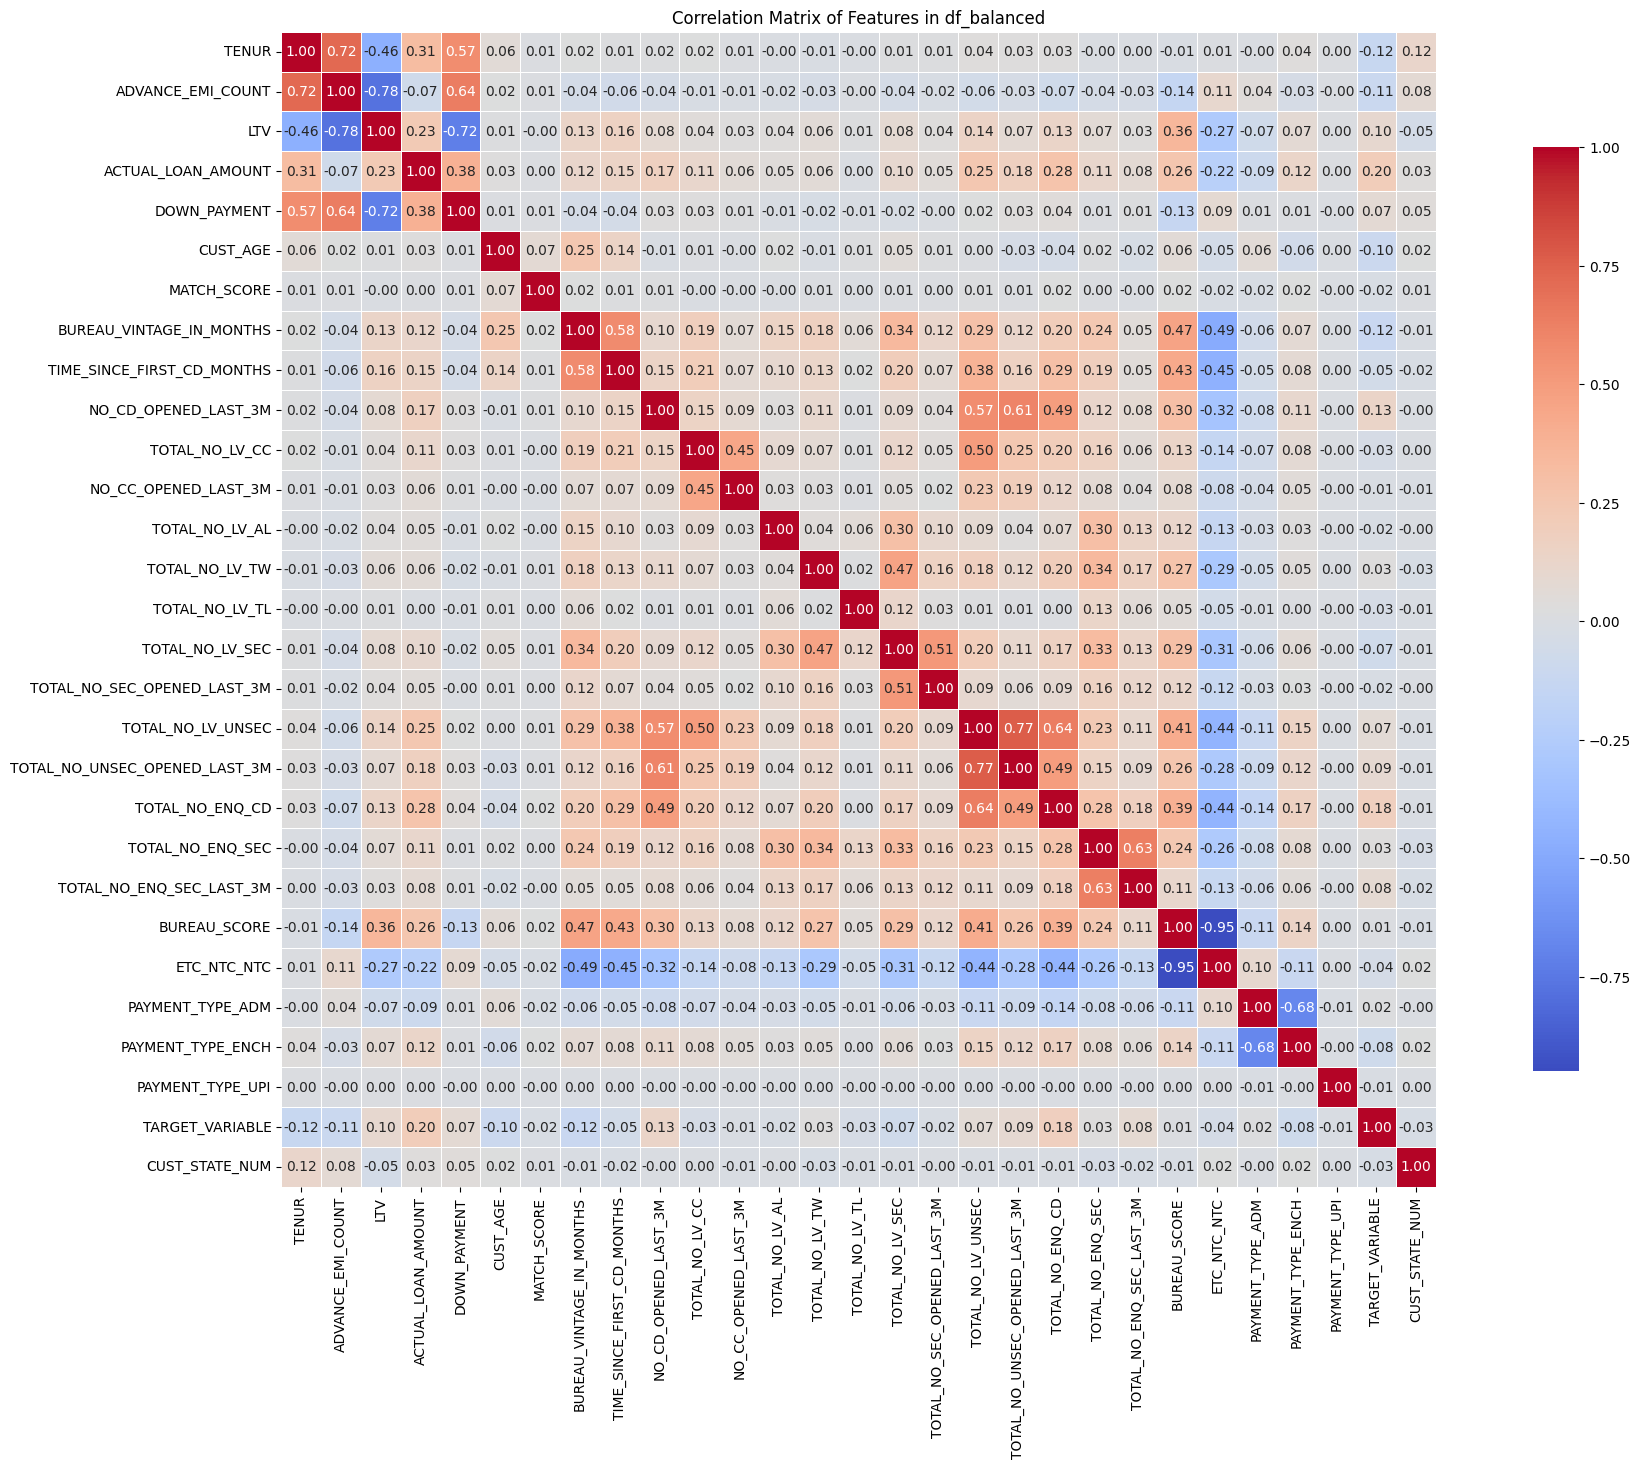

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix directly from df_balanced
correlation_matrix = df_balanced.corr()

# Plotting the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features in df_balanced')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


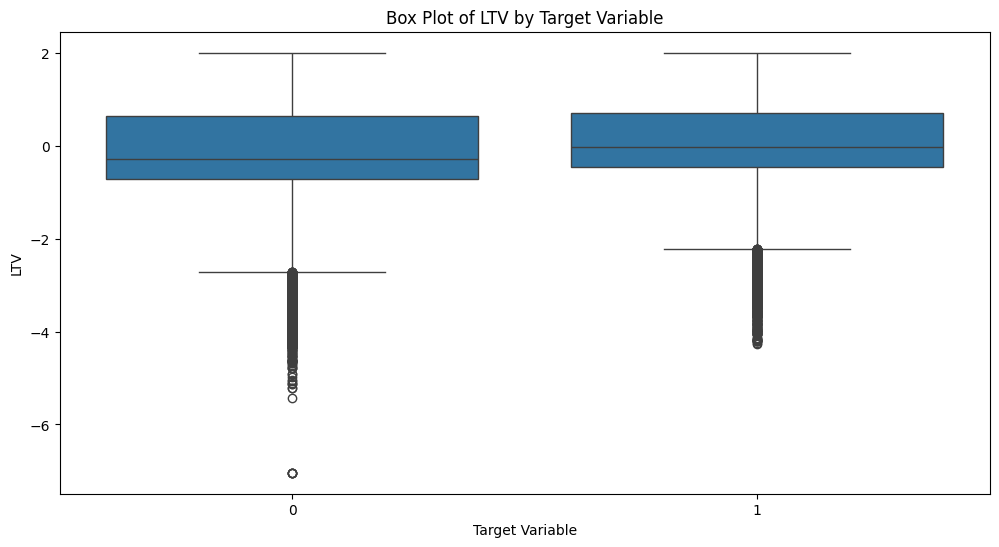

In [ ]:
# Box plot of another numerical feature against TARGET_VARIABLE
plt.figure(figsize=(12, 6))
sns.boxplot(x='TARGET_VARIABLE', y='LTV', data=df_balanced)
plt.title('Box Plot of LTV by Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('LTV')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

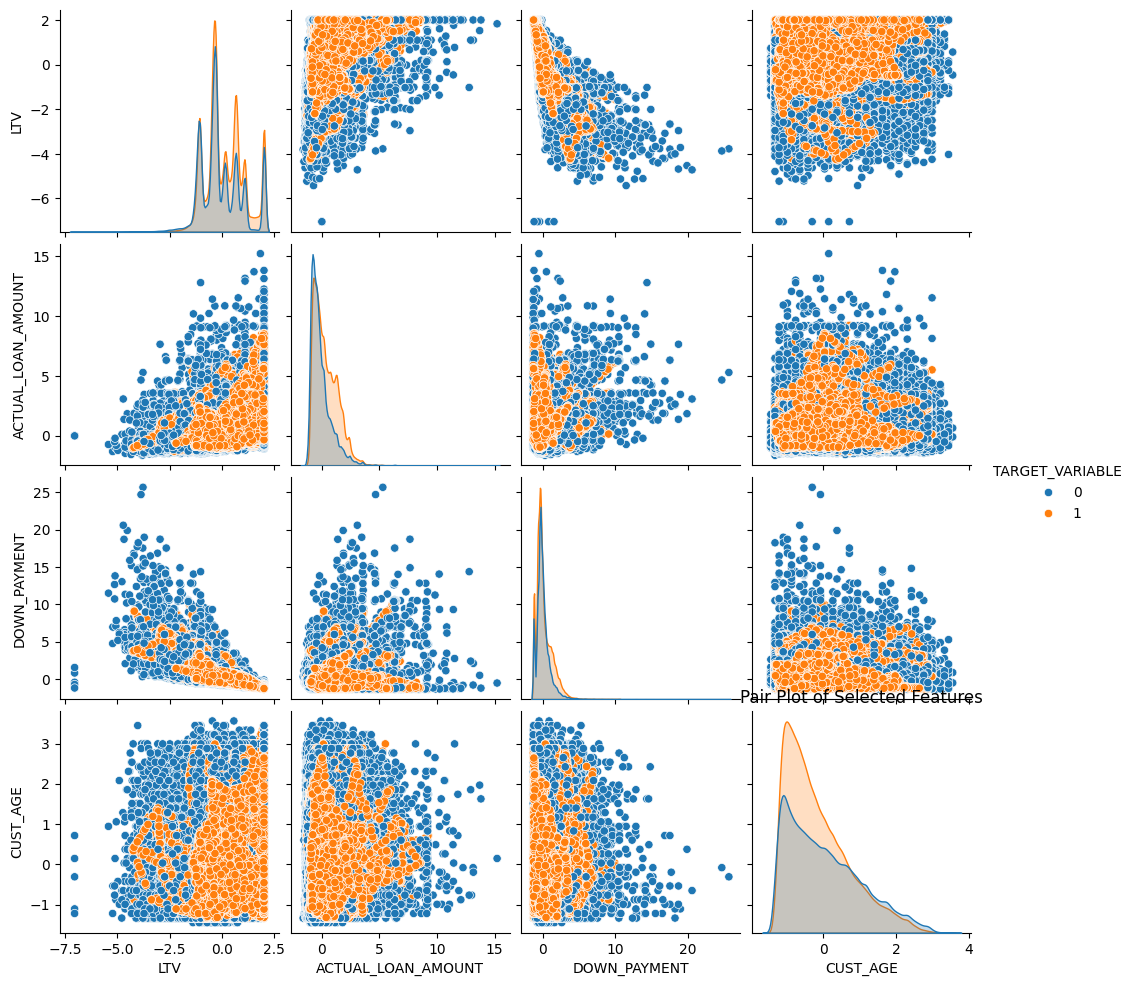

In [ ]:
# Pair plot for numerical features
sns.pairplot(df_balanced, hue='TARGET_VARIABLE', vars=['LTV', 'ACTUAL_LOAN_AMOUNT', 'DOWN_PAYMENT', 'CUST_AGE'])
plt.title('Pair Plot of Selected Features')
plt.show()

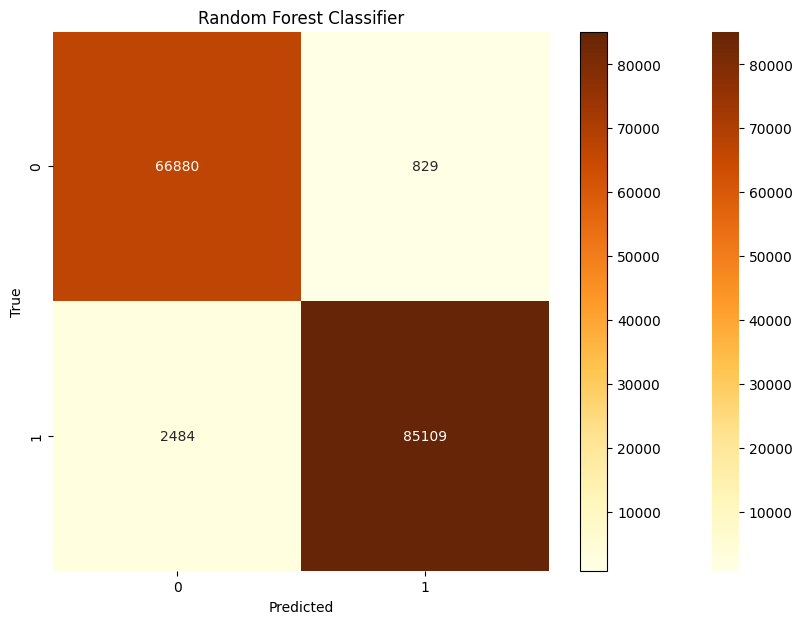

Accuracy Achieved for Random Forest Classifier:  97.86673706713371  %
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     67709
           1       0.99      0.97      0.98     87593

    accuracy                           0.98    155302
   macro avg       0.98      0.98      0.98    155302
weighted avg       0.98      0.98      0.98    155302




In [ ]:
cimport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming df_balanced is your DataFrame containing features and the target variable
# Splitting the DataFrame into features (X) and target variable (y)
X = df_balanced.drop(columns=['TARGET_VARIABLE'])
y = df_balanced['TARGET_VARIABLE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to display confusion matrix and classification report
def display_confussion(name, y_pred, y_test):
    c_m = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(c_m, annot=True, fmt='d', cmap=sns.color_palette("YlOrBr", as_cmap=True))

    plt.colorbar(ax.collections[0])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(name)
    plt.show()

    print("Accuracy Achieved for " + name + ": ", accuracy_score(y_test, y_pred) * 100, " %")
    # zero_division=0 to suppress warning for low count of DX=2 in our dataframe
    print(classification_report(y_test, y_pred, zero_division=0))
    print()

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Displaying results for Random Forest
display_confussion("Random Forest Classifier", y_pred_rf, y_test)
